In [1]:
import pandas as pd
import numpy as np
import io
import requests

In [2]:
url = "https://raw.githubusercontent.com/rajdeepsaha0809/MTH552A--Statistical-and-AI-Techniques-in-Data-Mining/main/Bank%20Marketing%20Dataset.csv" 
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [3]:
df.shape

(49732, 17)

In [4]:
df.head()

,age,job,marital_status,education,default,balance,housing,loan,contact,day,month,duration,campaign,p_days,previous,p_outcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.isna().sum() 
#There are no missing values

age               0
job               0
marital_status    0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
p_days            0
previous          0
p_outcome         0
y                 0
dtype: int64

In [6]:
df['y'].value_counts()/df.shape[0]

no     0.883174
yes    0.116826
Name: y, dtype: float64

### Categorical Variables 
'job', 'marital_status', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day', 'p_outcome' 

### Numerical Variables
'age', 'balance', 'duration', 'campaign', 'p_days', 'previous'

### Response Variable
'y'

In [7]:
df.columns

Index(['age', 'job', 'marital_status', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'p_days', 'previous', 'p_outcome', 'y'],
      dtype='object')

In [8]:
cv = ['job', 'marital_status', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day', 'p_outcome']


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cv:
    df[i] = le.fit_transform(df[i])
df.head(10)

,age,job,marital_status,education,default,balance,housing,loan,contact,day,month,duration,campaign,p_days,previous,p_outcome,y
0,58,4,1,2,0,2143,1,0,2,4,8,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,4,8,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,4,8,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,4,8,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,4,8,198,1,-1,0,3,no
5,35,4,1,2,0,231,1,0,2,4,8,139,1,-1,0,3,no
6,28,4,2,2,0,447,1,1,2,4,8,217,1,-1,0,3,no
7,42,2,0,2,1,2,1,0,2,4,8,380,1,-1,0,3,no
8,58,5,1,0,0,121,1,0,2,4,8,50,1,-1,0,3,no
9,43,9,2,1,0,593,1,0,2,4,8,55,1,-1,0,3,no


In [10]:
df['deposit'] = le.fit_transform(df['y'])

In [11]:
df.drop('y', 1, inplace=True)
df.head()

,age,job,marital_status,education,default,balance,housing,loan,contact,day,month,duration,campaign,p_days,previous,p_outcome,deposit
0,58,4,1,2,0,2143,1,0,2,4,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,4,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,4,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,4,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,4,8,198,1,-1,0,3,0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [13]:
X = df.iloc[:,0:df.shape[1]-1]
y = df['deposit']

In [14]:
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.30, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_rest, y_rest, test_size=1/3, random_state=42)

In [15]:
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)

(34812, 16)
(9946, 16)
(4974, 16)


In [16]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train,y_train)
print(X_res.shape)

(61426, 16)


In [17]:
y_res.value_counts()/len(y_res)

0    0.5
1    0.5
Name: deposit, dtype: float64

In [18]:
LR = LogisticRegression(random_state=42)
LR.fit(X_res, y_res)
y_plr = LR.predict(X_cv)
y_pred_plr = LR.predict_proba(X_cv)[:,1]

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


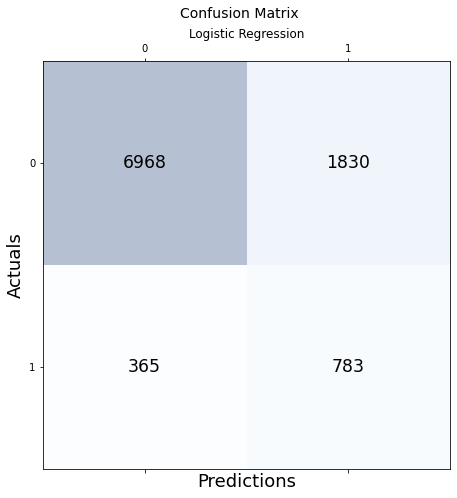

In [19]:
conf_matrix = confusion_matrix(y_true=y_cv, y_pred = y_plr)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.suptitle('Confusion Matrix', fontsize=14)
plt.title('Logistic Regression', fontsize=12)

plt.show()
#plt.savefig('cnf.jpg', format = 'jpg')

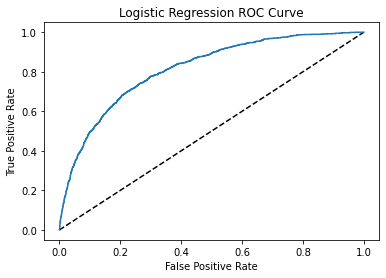

Accuracy: 0.7793082646289966
F1-score: 0.4163786227067269
AUC: 0.813399347175039


In [20]:
fpr, tpr, thresholds = roc_curve(y_cv, y_pred_plr)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()
#plt.savefig('roc_lr.png', dpi = 1000, format = 'png')
print("Accuracy:",metrics.accuracy_score(y_cv, y_plr))
print("F1-score:", metrics.f1_score(y_cv, y_plr))
print("AUC:", metrics.roc_auc_score(y_cv, y_pred_plr))

In [21]:
dep = list(range(2,15))
acc = 0
dep_min = 0
for i in dep:
    tm = DecisionTreeClassifier(criterion="entropy", max_depth= i, random_state=42)
    tm.fit(X_res, y_res)
    y_tm = tm.predict(X_cv)
    acc_tm = metrics.accuracy_score(y_cv, y_tm)
    if acc_tm > acc:
        acc = acc_tm
        dep_min = i

print(acc)
print(dep_min)

0.8509953750251358
14


In [22]:
ct = DecisionTreeClassifier(criterion="entropy", max_depth= 14, random_state=42)
ct.fit(X_res, y_res)
y_pdt = ct.predict(X_cv)

In [23]:
#ct.get_depth()

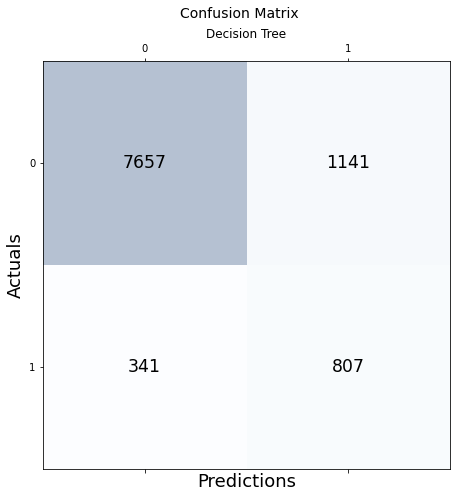

In [24]:
conf_matrix = confusion_matrix(y_true=y_cv, y_pred = y_pdt)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.suptitle('Confusion Matrix', fontsize=14)
plt.title('Decision Tree', fontsize=12)
plt.show()
#plt.savefig('cnf_dt.png', dpi = 1000, format = 'png')

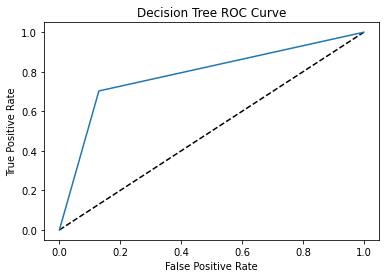

Accuracy: 0.8509953750251358
F1-score: 0.5213178294573643
AUC: 0.7866365534453903


In [25]:
fpr, tpr, thresholds = roc_curve(y_cv, y_pdt)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show()
#plt.savefig('roc_dt.png', dpi = 1000, format = 'png')
print("Accuracy:",metrics.accuracy_score(y_cv, y_pdt))
print("F1-score:", metrics.f1_score(y_cv, y_pdt))
print("AUC:", metrics.roc_auc_score(y_cv, y_pdt))

In [26]:
rf = RandomForestClassifier(n_estimators= 100, max_depth = 13, random_state=42)
rf.fit(X_res, y_res)
y_prf = rf.predict(X_cv)

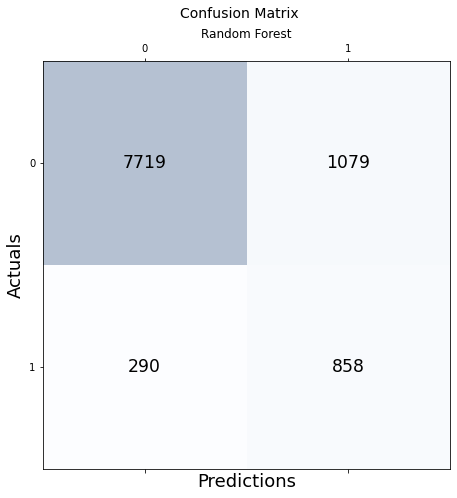

In [27]:
conf_matrix = confusion_matrix(y_true=y_cv, y_pred = y_prf)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.suptitle('Confusion Matrix', fontsize=14)
plt.title('Random Forest', fontsize=12)
plt.show()
#plt.savefig('cnf_rf.png', dpi = 1000, format = 'png')

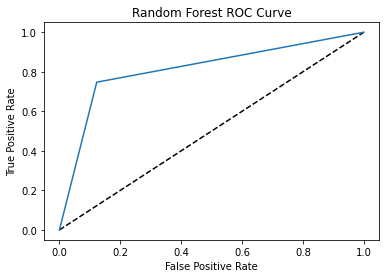

Accuracy: 0.8623567263221396
F1-score: 0.5562398703403566
AUC: 0.8123726250739597


In [28]:
fpr, tpr, thresholds = roc_curve(y_cv, y_prf)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()
#plt.savefig('auc_rf.png', dpi = 1000, format = 'png')
print("Accuracy:",metrics.accuracy_score(y_cv, y_prf))
print("F1-score:", metrics.f1_score(y_cv, y_prf))
print("AUC:", metrics.roc_auc_score(y_cv, y_prf))

In [29]:
gbc = GradientBoostingClassifier(learning_rate=0.2, random_state=42)
gbc.fit(X_res, y_res)
y_gbc = gbc.predict(X_cv)

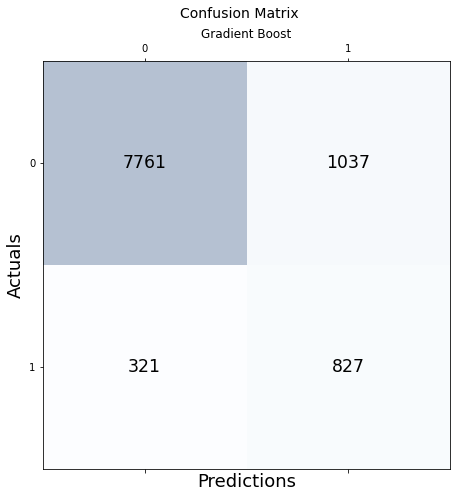

In [30]:
conf_matrix = confusion_matrix(y_true=y_cv, y_pred = y_gbc)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.suptitle('Confusion Matrix', fontsize=14)
plt.title('Gradient Boost', fontsize=12)
plt.show()

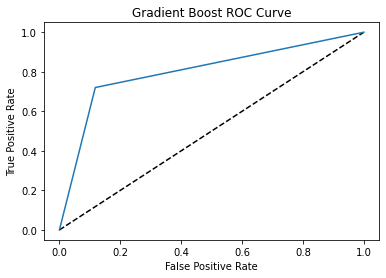

Accuracy: 0.8634626985722904
F1-score: 0.549136786188579
AUC: 0.801257789028707


In [31]:
fpr, tpr, thresholds = roc_curve(y_cv, y_gbc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Gradient Boost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boost ROC Curve')
plt.show()
#plt.savefig('auc_rf.png', dpi = 1000, format = 'png')
print("Accuracy:",metrics.accuracy_score(y_cv, y_gbc))
print("F1-score:", metrics.f1_score(y_cv, y_gbc))
print("AUC:", metrics.roc_auc_score(y_cv, y_gbc))

In [32]:
from sklearn.ensemble import AdaBoostClassifier

In [33]:
abc = AdaBoostClassifier(learning_rate=0.1, random_state=42)
abc.fit(X_res, y_res)
y_abc = abc.predict(X_cv)

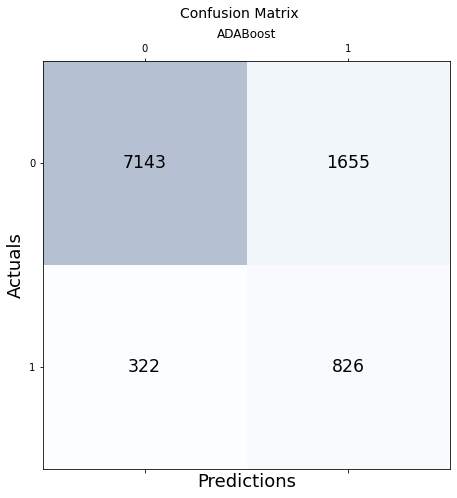

In [34]:
conf_matrix = confusion_matrix(y_true=y_cv, y_pred = y_abc)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.suptitle('Confusion Matrix', fontsize=14)
plt.title('ADABoost', fontsize=12)
plt.show()

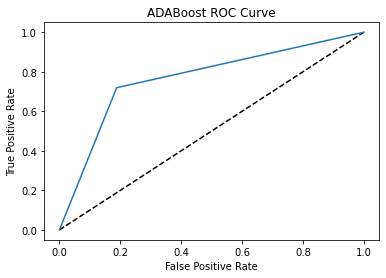

Accuracy: 0.8012266237683491
F1-score: 0.4552218241939929
AUC: 0.7657006304093501


In [35]:
fpr, tpr, thresholds = roc_curve(y_cv, y_abc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ADABoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ADABoost ROC Curve')
plt.show()
#plt.savefig('auc_rf.png', dpi = 1000, format = 'png')
print("Accuracy:",metrics.accuracy_score(y_cv, y_abc))
print("F1-score:", metrics.f1_score(y_cv, y_abc))
print("AUC:", metrics.roc_auc_score(y_cv, y_abc))

### Random Forest is the best model

In [36]:
y_pred = rf.predict(X_test)

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("AUC:",roc_auc_score(y_test, y_pred))

Accuracy: 0.8673100120627262
F1-score: 0.5629139072847682
AUC: 0.8182720173568985


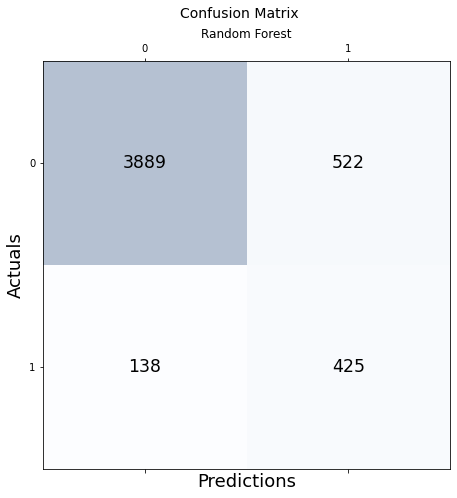

In [38]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred = y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.suptitle('Confusion Matrix', fontsize=14)
plt.title('Random Forest', fontsize=12)
plt.show()
#plt.savefig('cnf_final.png', dpi = 1000, format = 'png')

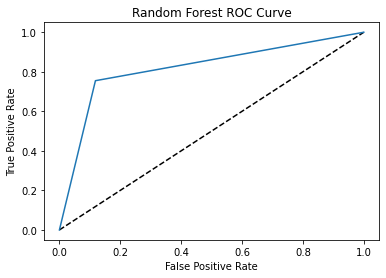

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()
#plt.savefig('roc_final.png', dpi = 1000, format = 'png')